In [1]:
import tensorflow 
from tensorflow import keras
import cv2
import numpy as np
import os

In [18]:
input=keras.Input(shape=(160,160,3))
conv1=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(input)
conv1=keras.layers.BatchNormalization()(conv1)
conv2=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv2=keras.layers.BatchNormalization()(conv2)
conv3=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)

y_conv1=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
y_conv1=keras.layers.MaxPool2D()(y_conv1)
y_conv1=keras.layers.BatchNormalization()(y_conv1)
y_conv2=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv1)
y_conv2=keras.layers.BatchNormalization()(y_conv2)
yd_conv2=keras.layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding='same')(y_conv2)

conv3=keras.layers.BatchNormalization()(conv3)
conv4=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv3)
conv4=keras.layers.BatchNormalization()(conv4)
conv4_u=keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(conv4)
conv4_u=keras.layers.MaxPool2D()(conv4_u)

y_conv3=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv2)
y_conv3=keras.layers.concatenate([y_conv3,conv4_u],axis=3)
y_conv3=keras.layers.BatchNormalization()(y_conv3)
y_conv4=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv3)
y_conv4=keras.layers.BatchNormalization()(y_conv4)
yd_conv4=keras.layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding='same')(y_conv4)
y_conv4_u=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv4)
y_conv4_u=keras.layers.MaxPool2D()(y_conv4_u)

conv5=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv4)
conv5=keras.layers.concatenate([conv5,yd_conv2],axis=3)
conv5=keras.layers.BatchNormalization()(conv5)
conv6=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv5)
conv6=keras.layers.BatchNormalization()(conv6)
conv6_u=keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(conv6)
conv6_u=keras.layers.MaxPool2D()(conv6_u)
conv6_u_u=keras.layers.MaxPool2D()(conv6_u)

z_conv1=keras.layers.concatenate([conv6_u_u,y_conv4_u],axis=3)
z_conv2=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(z_conv1)
z_conv2=keras.layers.BatchNormalization()(z_conv2)
z_conv3=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(z_conv2)
z_conv3=keras.layers.BatchNormalization()(z_conv3)
zd_conv3=keras.layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding='same')(z_conv3)
zdd_conv3=keras.layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding='same')(zd_conv3)

conv7=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv6)
conv7=keras.layers.concatenate([conv7,yd_conv4],axis=3)
conv7=keras.layers.BatchNormalization()(conv7)
conv8=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv7)
conv8=keras.layers.BatchNormalization()(conv8)
conv8_u=keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(conv8)
conv8_u=keras.layers.MaxPool2D()(conv8_u)

y_conv5=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv4)
y_conv5=keras.layers.concatenate([y_conv5,conv6_u],axis=3)
y_conv5=keras.layers.BatchNormalization()(y_conv5)
y_conv6=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(y_conv5)
y_conv6=keras.layers.concatenate([y_conv6,conv8_u],axis=3)
y_conv6=keras.layers.concatenate([y_conv6,zd_conv3],axis=3)
y_conv6=keras.layers.BatchNormalization()(y_conv6)
yd_conv6=keras.layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding='same')(y_conv6)

conv9=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv8)
conv9=keras.layers.concatenate([conv9,yd_conv6],axis=3)
conv9=keras.layers.concatenate([conv9,zdd_conv3],axis=3)
conv9=keras.layers.BatchNormalization()(conv9)
conv10=keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(conv9)
conv10=keras.layers.BatchNormalization()(conv10)
output=keras.layers.Conv2D(filters=1,kernel_size=(1,1),strides=(1,1),padding='same')(conv10)


model=keras.Model(inputs=input,outputs=output)
adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['acc'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 160, 160, 256 7168        input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 160, 160, 256 1024        conv2d_142[0][0]                 
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 160, 160, 256 590080      batch_normalization_120[0][0]    
____________________________________________________________________________________________

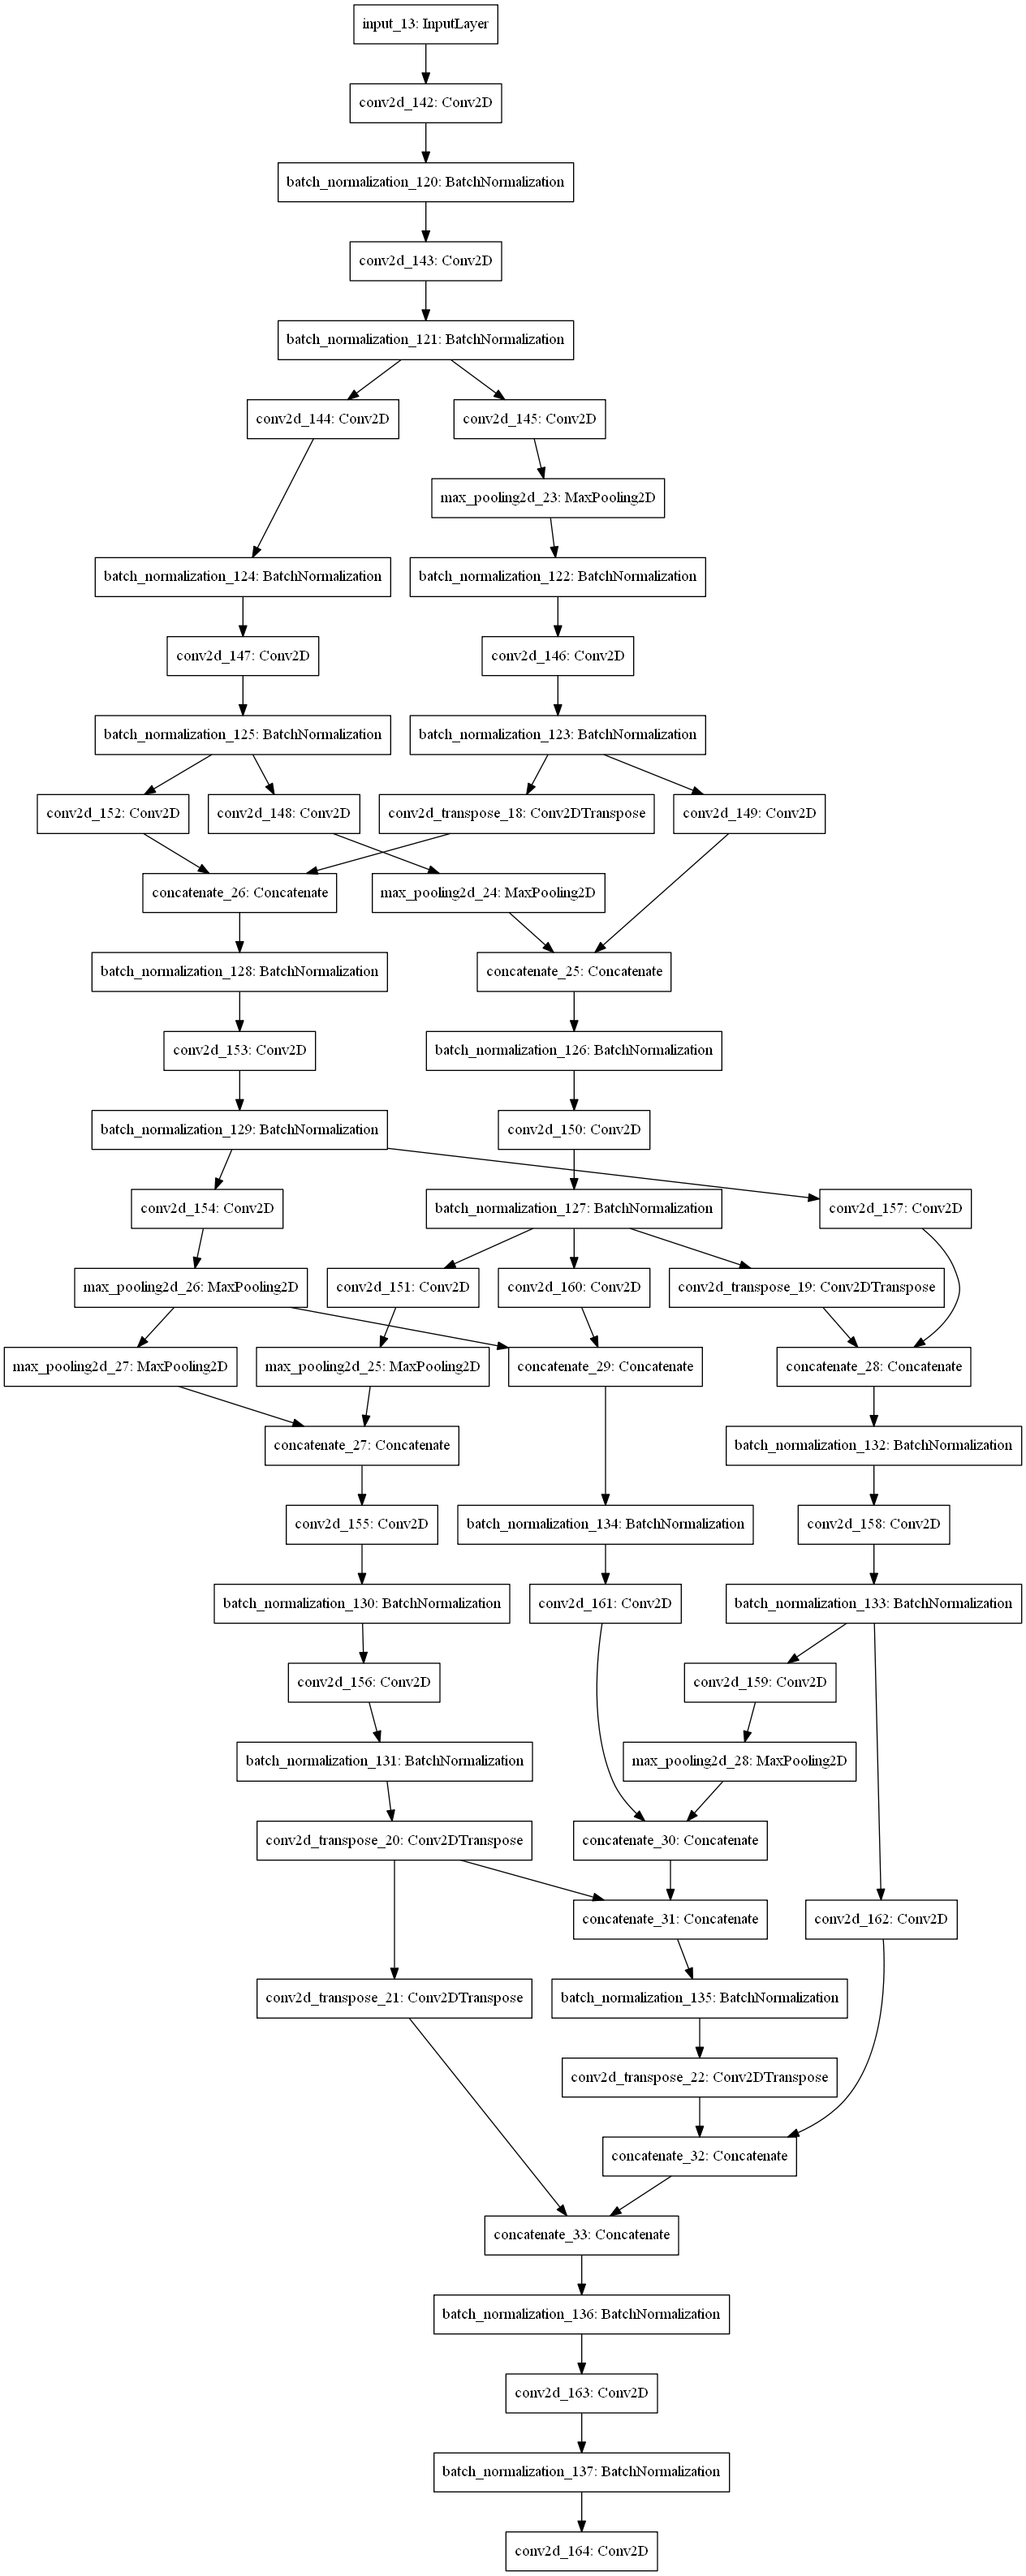

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
filename=os.listdir("./project/rgb/")
class generator(keras.utils.Sequence):
    def __init__(self, image_filenames, batch_size):
        self.image_filenames = image_filenames
        self.batch_size = batch_size
    def __len__(self):
        return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
    def __getitem__(self,idx):
        batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
        train=[]
        labels=[]
        for i in batch_x:
            img=cv2.imread("./project/rgb/"+i)
            img=cv2.resize(img,(160,160))
            img=img/255
            train.append(img)
            img=cv2.imread("./project/depth/depth"+i[5:-4]+"_trans.png",-1)
            img=cv2.resize(img,(160,160))
            img=img/(255*255)
            img=np.expand_dims(img,axis=2)
            labels.append(img)
        train=np.array(train)
        labels=np.array(labels)
        print(labels.shape)
        return train,labels

Error: Session cannot generate requests

In [25]:
train=[]
test=[]
n=0
for i in filename:
    if(n%10!=0):
        train.append(i)
    else:
        test.append(i)
    n=n+1
print(len(train))
print(len(test))
train_load=generator(train,6)
test_load=generator(test,6)

225
26


In [26]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
def scheduler(epoch):
    epochs=100
    lr_epochs=200
    lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, lr * (0.1 ** (epoch // lr_epochs)))
    return K.get_value(model.optimizer.lr)
lr_new = LearningRateScheduler(scheduler)
history = model.fit(train_load,epochs = 100, shuffle=True,verbose = 1,validation_data=test_load,callbacks = [lr_new])
model.save("result.h5")

(6, 160, 160)
Epoch 1/100
(6, 160, 160)
(6, 160, 160)
